# 加权最小二乘

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st

## 1.能识别异方差根源

In [3]:
data = pd.read_csv("/Users/luofeifei/study/RegressionAnalysis/All_Data/P176.txt",sep="\t")
data.head()

,X,Y
0,294,30
1,247,32
2,267,37
3,358,44
4,423,47


In [4]:
Ols_model = smf.ols("Y~X",data).fit()
print(Ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     86.54
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           1.35e-09
Time:                        13:48:08   Log-Likelihood:                -120.40
No. Observations:                  27   AIC:                             244.8
Df Residuals:                      25   BIC:                             247.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4481      9.562      1.511      0.1

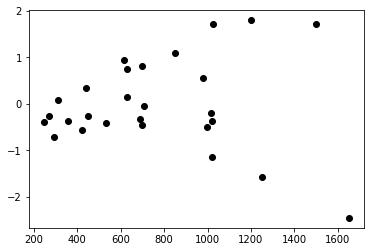

In [6]:
plt.plot(data.X.values,Ols_model.resid_pearson,'ko')
plt.show()

In [14]:
Wls_model = sm.OLS(data.Y/data.X,sm.add_constant(1/data.X)).fit()
print(Wls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.6927
Date:                Fri, 11 Sep 2020   Prob (F-statistic):              0.413
Time:                        13:52:18   Log-Likelihood:                 64.975
No. Observations:                  27   AIC:                            -126.0
Df Residuals:                      25   BIC:                            -123.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1210      0.009     13.445      0.0

## 2.不能识别异方差根源

In [138]:
edu_data = pd.read_csv("/Users/luofeifei/study/RegressionAnalysis/All_Data/P198.txt",sep=' \t',engine='python')
edu_data = edu_data.drop(48)
edu_data.set_index("State",drop=True)
edu_Model = smf.ols("Y~X1+X2+X3",edu_data).fit()

sigma = sum(edu_Model.resid.values**2)/49
edu_data = pd.concat([edu_data,edu_Model.resid],axis=1)
edu_data.columns = ["State","Y","X1","X2","X3","Region","se"]

In [139]:
state1 = edu_data.loc[edu_data["Region"]==1,:]
state2 = edu_data.loc[edu_data["Region"]==2,:]
state3 = edu_data.loc[edu_data["Region"]==3,:]
state4 = edu_data.loc[edu_data["Region"]==4,:]

sig1 = sum(state1.se.values**2)/(state1.shape[0]-1)
sig2 = sum(state2.se.values**2)/(state2.shape[0]-1)
sig3 = sum(state3.se.values**2)/(state3.shape[0]-1)
sig4 = sum(state4.se.values**2)/(state4.shape[0]-1)

c1 = np.sqrt(sig1/sigma)
c2 = np.sqrt(sig2/sigma)
c3 = np.sqrt(sig3/sigma)
c4 = np.sqrt(sig4/sigma)

def fun1(x):
    return x/c1
def fun2(x):
    return x/c2
def fun3(x):
    return x/c3
def fun4(x):
    return x/c4

state1.loc[:,["Y","X1","X2","X3"]] = state1.loc[:,["Y","X1","X2","X3"]].apply(fun1)
state2.loc[:,["Y","X1","X2","X3"]] = state2.loc[:,["Y","X1","X2","X3"]].apply(fun2)
state3.loc[:,["Y","X1","X2","X3"]] = state3.loc[:,["Y","X1","X2","X3"]].apply(fun3)
state4.loc[:,["Y","X1","X2","X3"]] = state4.loc[:,["Y","X1","X2","X3"]].apply(fun4)

state1["con"] = np.full(len(state1),1/c1)
state2["con"] = np.full(len(state2),1/c2)
state3["con"] = np.full(len(state3),1/c3)
state4["con"] = np.full(len(state4),1/c4)

/Users/luofeifei/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/Users/luofeifei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/luofeifei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [140]:
newdata = pd.concat([state1,state2,state3,state4],axis=0)
newdata.head()

,State,Y,X1,X2,X3,Region,se,con
0,ME,199.585952,3349.646787,276.023125,431.445377,1,-0.073537,0.849302
1,NH,196.188744,3888.104207,274.324521,479.006285,1,-36.657998,0.849302
2,VT,229.311519,3406.550016,278.571031,273.475219,1,41.453284,0.849302
3,MA,221.667802,4444.396967,259.037087,718.509428,1,-41.160696,0.849302
4,RI,254.790577,4059.663196,257.338483,739.741976,1,19.820253,0.849302


In [141]:
WLS_model = smf.ols("Y~X1+X2+X3+con-1",newdata).fit()

In [142]:
print(WLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1595.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):                    7.72e-48
Time:                        18:51:32   Log-Likelihood:                         -237.76
No. Observations:                  49   AIC:                                      483.5
Df Residuals:                      45   BIC:                                      491.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------